# Prepare a prediction model for profit of 50_startups data.
# Do transformations for getting better predictions of profit and
# make a table containing R^2 value for each prepared model.

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf

In [3]:
startups=pd.read_csv('C:\\Users\\Anjana\\Desktop\\DS Assignments\\multilinearregression\\50_Startups (1).csv')
startups

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [4]:
startups.columns=["RnD_Spend","Administration","Marketing_Spend","State","Profit"]

In [5]:
startups.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RnD_Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing_Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [6]:
startups.duplicated()#no duplicates

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34    False
35    False
36    False
37    False
38    False
39    False
40    False
41    False
42    False
43    False
44    False
45    False
46    False
47    False
48    False
49    False
dtype: bool

In [7]:
startups.isna().sum()#no missing values

RnD_Spend          0
Administration     0
Marketing_Spend    0
State              0
Profit             0
dtype: int64

In [8]:
startups.corr()

,RnD_Spend,Administration,Marketing_Spend,Profit
RnD_Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing_Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


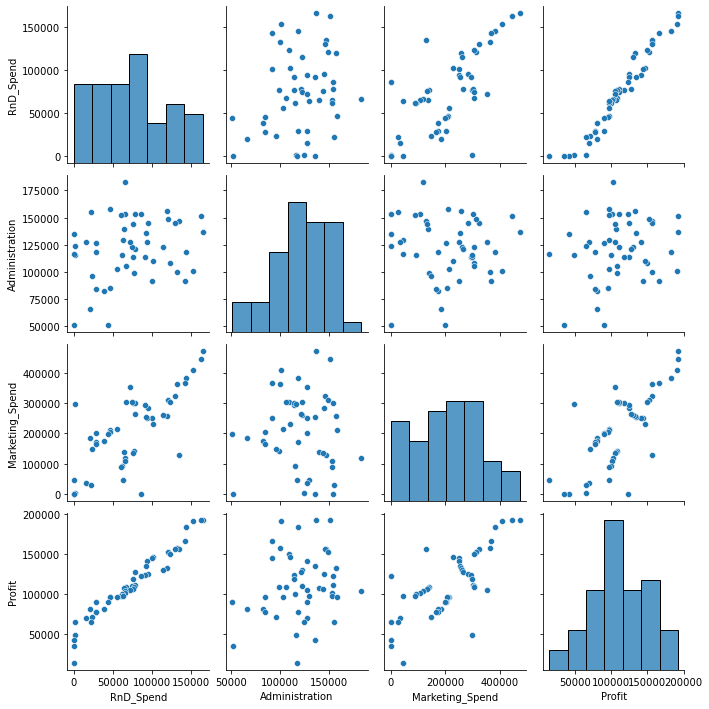

In [9]:
sns.pairplot(startups) #scatterplot between variables aling with histpgrams

<AxesSubplot:>

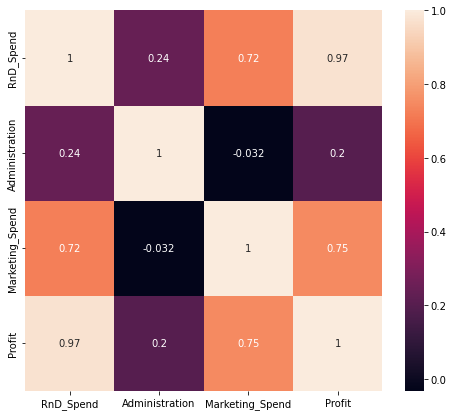

In [10]:
plt.figure(figsize=(8,7))
sns.heatmap(startups.corr(),annot=True)

<AxesSubplot:xlabel='Administration', ylabel='Density'>

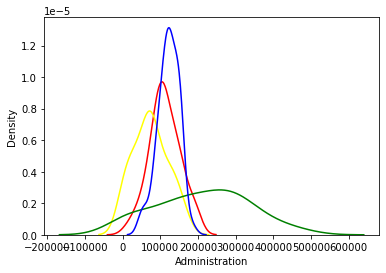

In [11]:
#checking for normality in the data
sns.distplot(startups['Profit'],color='red',hist=False)

sns.distplot(startups['RnD_Spend'],color='yellow',hist=False)

sns.distplot(startups['Marketing_Spend'],color='green',hist=False)

sns.distplot(startups['Administration'],color='blue',hist=False)

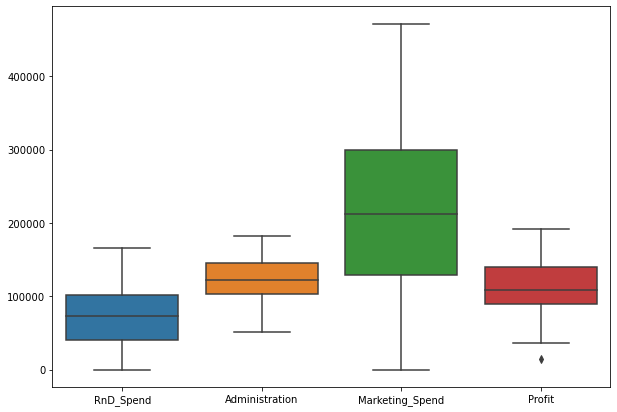

In [12]:
#checking for outliers
plt.figure(figsize=(10,7))
sns.boxplot(data=startups)
plt.show()

In [13]:
startupsnew=pd.get_dummies(startups,columns=['State'])

In [14]:
startupsnew

,RnD_Spend,Administration,Marketing_Spend,Profit,State_California,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0
5,131876.90,99814.71,362861.36,156991.12,0,0,1
6,134615.46,147198.87,127716.82,156122.51,1,0,0
7,130298.13,145530.06,323876.68,155752.60,0,1,0
8,120542.52,148718.95,311613.29,152211.77,0,0,1
9,123334.88,108679.17,304981.62,149759.96,1,0,0


In [15]:
#model building
model1=smf.ols('Profit~RnD_Spend+Administration+Marketing_Spend',data=startupsnew).fit()

In [16]:
model1

In [17]:
model1.fittedvalues

0     192521.252890
1     189156.768232
2     182147.279096
3     173696.700026
4     172139.514183
5     163580.780571
6     158114.096669
7     160021.363048
8     151741.699699
9     154884.684110
10    135509.016367
11    135573.712961
12    129138.054182
13    127487.991663
14    149548.646335
15    146235.159985
16    116915.405401
17    130192.447208
18    129014.226806
19    115635.216367
20    116639.669231
21    117319.451640
22    114706.981717
23    109996.615221
24    113362.966113
25    102237.725065
26    110600.575350
27    114408.071457
28    101660.026005
29    101794.983452
30     99452.372936
31     97687.856276
32     99001.328985
33     97915.007805
34     89039.273741
35     90511.599568
36     75286.174585
37     89619.537708
38     69697.430648
39     83729.011977
40     74815.953991
41     74802.556239
42     70620.411821
43     60167.039963
44     64611.354916
45     47650.649687
46     56166.206853
47     46490.588983
48     49171.388158
49     48215.134111


In [18]:
model1.resid

0      -259.422890
1      2635.291768
2      8903.110904
3      9205.289974
4     -5951.574183
5     -6589.660571
6     -1991.586669
7     -4268.763048
8       470.070301
9     -5124.724110
10    10612.933633
11     8685.687039
12    12447.465818
13     6819.358337
14   -16945.996335
15   -16318.119985
16    10077.524599
17    -4822.077208
18    -4747.326806
19     7141.643633
20     1834.360769
21    -6006.431640
22    -4354.731717
23    -1262.625221
24    -4810.926113
25     5166.614935
26    -4867.035350
27    -9399.761457
28     1622.353995
29     -790.343452
30      485.217064
31     -204.296276
32    -1573.488985
33    -1136.087805
34     7673.526259
35     5967.910432
36    15422.015415
37      329.602292
38    11531.629352
39    -2723.251977
40     3423.956009
41     2996.273761
42      878.078179
43     9591.940037
44      588.975084
45    17275.430313
46    -6675.456853
47    -3930.858983
48   -13497.978158
49   -33533.734111
dtype: float64

In [19]:
model1.params#coefficients

Intercept          50122.192990
RnD_Spend              0.805715
Administration        -0.026816
Marketing_Spend        0.027228
dtype: float64

In [20]:
#tvalues
model1.tvalues

Intercept           7.626218
RnD_Spend          17.846374
Administration     -0.525507
Marketing_Spend     1.655077
dtype: float64

In [21]:
#pvalues
model1.pvalues

Intercept          1.057379e-09
RnD_Spend          2.634968e-22
Administration     6.017551e-01
Marketing_Spend    1.047168e-01
dtype: float64

In [22]:
# R squared values
model1.rsquared#since the r squared value is close to 1,this model can be appreciated

0.9507459940683246

In [23]:
pd.DataFrame(model1.predict())
#model1.predicted profit

,0
0,192521.252890
1,189156.768232
2,182147.279096
3,173696.700026
4,172139.514183
5,163580.780571
6,158114.096669
7,160021.363048
8,151741.699699
9,154884.684110


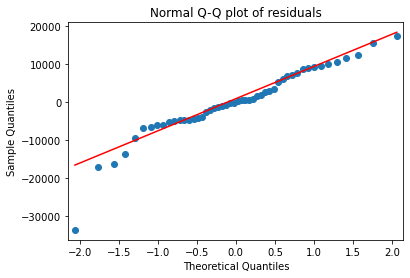

In [24]:
#residue analysis
import statsmodels.api as sm
qqplot=sm.qqplot(model1.resid,line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()

<AxesSubplot:>

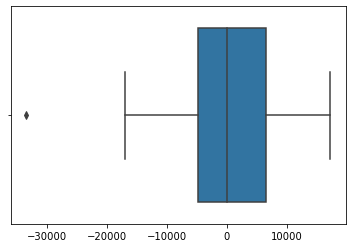

In [25]:
sns.boxplot(model1.resid)

<AxesSubplot:ylabel='Count'>

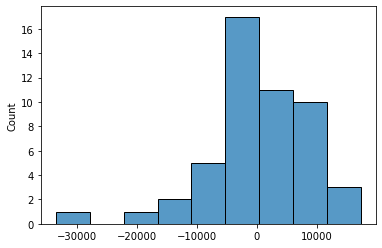

In [26]:
sns.histplot(model1.resid)

<AxesSubplot:ylabel='Density'>

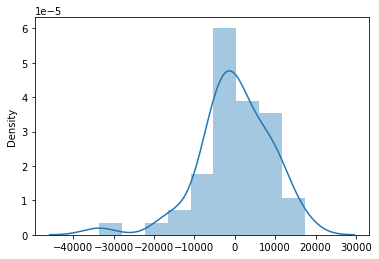

In [27]:
sns.distplot(model1.resid)

In [28]:
#Residual plot for Homoscedasticity
def get_standardized_values(vals):
    return (vals-vals.mean())/vals.std()

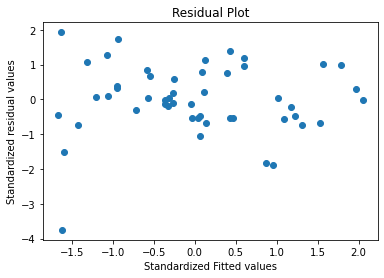

In [29]:
plt.scatter(get_standardized_values(model1.fittedvalues),
            get_standardized_values(model1.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

In [30]:
#detecting influencers/outliers
#cook's Distance
startupsnew.shape

(50, 7)

In [31]:
model1_influence=model1.get_influence()
(c,_)=model1_influence.cooks_distance
c

array([3.21825244e-05, 3.27591036e-03, 3.23842699e-02, 2.17206555e-02,
       1.44833032e-02, 1.17158463e-02, 2.91766303e-03, 3.56513444e-03,
       4.04303948e-05, 4.86758017e-03, 1.51064757e-02, 1.63564959e-02,
       1.15516625e-02, 4.01422811e-03, 6.12934253e-02, 3.40013448e-02,
       8.33556413e-03, 3.30534399e-03, 2.16819303e-03, 4.07440577e-02,
       4.25137222e-04, 1.09844352e-02, 2.91768000e-03, 2.76030254e-04,
       5.04643588e-03, 3.00074623e-03, 3.41957068e-03, 2.98396413e-02,
       1.31590664e-03, 1.25992620e-04, 4.18505125e-05, 9.27434786e-06,
       7.08656521e-04, 1.28122674e-04, 2.09815032e-02, 6.69508674e-03,
       5.55314705e-02, 6.55050578e-05, 5.61547311e-02, 1.54279607e-03,
       1.84850929e-03, 1.97578066e-03, 1.36089280e-04, 2.05553171e-02,
       1.23156041e-04, 9.03234206e-02, 5.45303387e-02, 5.33885616e-03,
       1.90527441e-01, 2.88082293e-01])

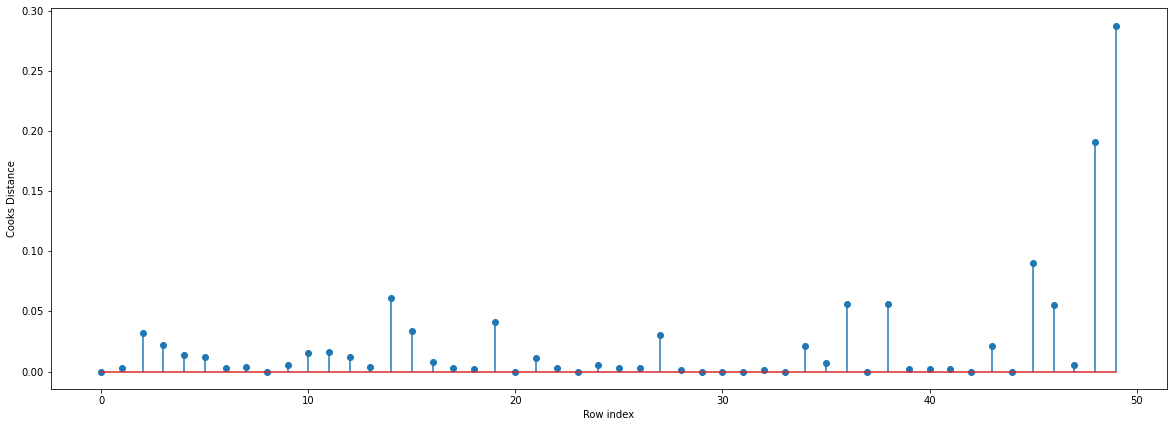

In [32]:
#plot the influence values using stem plot,COOK'S DISTANCE
fig=plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(startupsnew)),np.round(c,3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [33]:
#index and value of influencer where c is more than 0.5
(np.argmax(c),np.max(c))

(49, 0.2880822927543263)

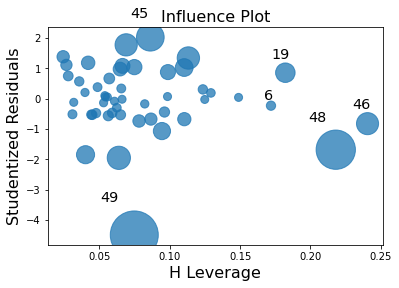

In [34]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model1)
plt.show()

In [35]:
#k= number of variables (columns)
#n= number of observations (rows)
k = 3
n = 50
leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff

0.24

In [36]:
#Discard the data points which are influencers and reasign the row number (reset_index())
startups.drop(startups.index[49],inplace=True)
startups.drop(startups.index[48],inplace=True)

startups

,RnD_Spend,Administration,Marketing_Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [37]:
#calculating Variance Influence Factor
reg_rd=smf.ols("RnD_Spend~Administration+Marketing_Spend",data=startupsnew).fit().rsquared
vif_rd=1/(1-reg_rd)

reg_ad=smf.ols("Administration~RnD_Spend+Marketing_Spend",data=startupsnew).fit().rsquared
vif_ad=1/(1-reg_rd)

reg_ma=smf.ols("Marketing_Spend~Administration+RnD_Spend",data=startupsnew).fit().rsquared
vif_ma=1/(1-reg_rd)


In [38]:
vif={'variables':['RnD_Spend','Administration','Marketing_Spend'],'VIF':[vif_rd,vif_ad,vif_ma]}

In [39]:
VIF=pd.DataFrame(vif)
VIF

,variables,VIF
0,RnD_Spend,2.468903
1,Administration,2.468903
2,Marketing_Spend,2.468903


In [40]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Wed, 10 Aug 2022   Prob (F-statistic):           4.53e-30
Time:                        13:48:20   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
RnD_Spend           0.8057      0.045     17.846      0.000       0.715       0.897
Administration     -0.0268      0.051     -0.526      0.602      -0.130       0.076
Marketing_Spend     0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [41]:
startups.drop(columns='State',axis=1,inplace=True)

In [42]:
startups.head()

,RnD_Spend,Administration,Marketing_Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


In [43]:
#final model
x_new=startups.iloc[:,0:3]
y_new=pd.DataFrame(startups.Profit)

In [44]:
x_new.head()

,RnD_Spend,Administration,Marketing_Spend
0,165349.20,136897.80,471784.10
1,162597.70,151377.59,443898.53
2,153441.51,101145.55,407934.54
3,144372.41,118671.85,383199.62
4,142107.34,91391.77,366168.42


In [45]:
y_new.head()

,Profit
0,192261.83
1,191792.06
2,191050.39
3,182901.99
4,166187.94


In [46]:
from sklearn.preprocessing import StandardScaler
standard_scale=StandardScaler().fit_transform(x_new)
final_standard_startup=pd.DataFrame(standard_scale)

In [47]:
final_standard_startup

,0,1,2
0,2.022971,0.530503,2.160416
1,1.960123,1.078706,1.922208
2,1.750986,-0.823073,1.614992
3,1.543838,-0.159529,1.403699
4,1.492101,-1.192349,1.258213
5,1.258427,-0.873458,1.229963
6,1.320978,0.920500,-0.778717
7,1.222366,0.857319,0.896943
8,0.999537,0.978050,0.792186
9,1.063318,-0.537851,0.735536


In [48]:
final_standard_startup.rename({0:'RnD_Spend',1:'Administration',2:'Marketing_Spend'},axis=1,inplace=True)

In [49]:
final_standard_startup

,RnD_Spend,Administration,Marketing_Spend
0,2.022971,0.530503,2.160416
1,1.960123,1.078706,1.922208
2,1.750986,-0.823073,1.614992
3,1.543838,-0.159529,1.403699
4,1.492101,-1.192349,1.258213
5,1.258427,-0.873458,1.229963
6,1.320978,0.920500,-0.778717
7,1.222366,0.857319,0.896943
8,0.999537,0.978050,0.792186
9,1.063318,-0.537851,0.735536


In [50]:
final_standard_startup['Profit']=y_new
final_standard_startup

,RnD_Spend,Administration,Marketing_Spend,Profit
0,2.022971,0.530503,2.160416,192261.83
1,1.960123,1.078706,1.922208,191792.06
2,1.750986,-0.823073,1.614992,191050.39
3,1.543838,-0.159529,1.403699,182901.99
4,1.492101,-1.192349,1.258213,166187.94
5,1.258427,-0.873458,1.229963,156991.12
6,1.320978,0.920500,-0.778717,156122.51
7,1.222366,0.857319,0.896943,155752.60
8,0.999537,0.978050,0.792186,152211.77
9,1.063318,-0.537851,0.735536,149759.96


In [51]:
final_model=smf.ols("Profit~RnD_Spend+Administration+Marketing_Spend",data=final_standard_startup).fit()

In [52]:
final_model

In [53]:
print('final_model.aic:',final_model.aic)
print('final_model.bic',final_model.bic)
print('final_model.rsquared',final_model.rsquared)


final_model.aic: 994.6690439260116
final_model.bic 1002.1538479696432
final_model.rsquared 0.9626766170294073


In [54]:
final_standard_startup['predicted_profit']=pd.DataFrame(model1.predict())

In [55]:
final_standard_startup

,RnD_Spend,Administration,Marketing_Spend,Profit,predicted_profit
0,2.022971,0.530503,2.160416,192261.83,192521.252890
1,1.960123,1.078706,1.922208,191792.06,189156.768232
2,1.750986,-0.823073,1.614992,191050.39,182147.279096
3,1.543838,-0.159529,1.403699,182901.99,173696.700026
4,1.492101,-1.192349,1.258213,166187.94,172139.514183
5,1.258427,-0.873458,1.229963,156991.12,163580.780571
6,1.320978,0.920500,-0.778717,156122.51,158114.096669
7,1.222366,0.857319,0.896943,155752.60,160021.363048
8,0.999537,0.978050,0.792186,152211.77,151741.699699
9,1.063318,-0.537851,0.735536,149759.96,154884.684110


In [56]:
#applying transformations

In [57]:

model2=smf.ols('Profit~np.log(RnD_Spend+Administration+Marketing_Spend)',data=startups).fit()

In [58]:
model2.params

Intercept                                              -827356.479053
np.log(RnD_Spend + Administration + Marketing_Spend)     73270.435548
dtype: float64

In [59]:
model2.pvalues

Intercept                                               8.131086e-11
np.log(RnD_Spend + Administration + Marketing_Spend)    1.677203e-12
dtype: float64

In [60]:
profit_predict2=model2.predict
profit_predict2

<bound method Results.predict of <statsmodels.regression.linear_model.OLSResults object at 0x000001CDB7A34340>>

In [61]:
model2.rsquared

0.6651256528008391

In [62]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.665
Model:                            OLS   Adj. R-squared:                  0.658
Method:                 Least Squares   F-statistic:                     91.36
Date:                Wed, 10 Aug 2022   Prob (F-statistic):           1.68e-12
Time:                        13:48:37   Log-Likelihood:                -545.99
No. Observations:                  48   AIC:                             1096.
Df Residuals:                      46   BIC:                             1100.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
Intercept                                            -8.274e+05   9.87e+04     -8.382      0.000   -1.03e+06   -6.29e+05
np.log(RnD_Spend + Administration + Marketing_Spend)  7.327e+04   7665.473      9.559      0.000    5.78e+04    8.87e+04
==============================================================================
Omnibus:                        4.969   Durbin-Watson:                   1.507
Prob(Omnibus):                  0.083   Jarque-Bera (JB):                4.204
Skew:                          -0.441   Prob(JB):                        0.122
Kurtosis:                       4.150   Cond. No.                         411.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [63]:
model2.predict()

array([166144.2711581 , 164598.62060403, 154746.40334704, 152923.71294672,
       147442.96927542, 146815.36603119, 119500.37893943, 147447.53152491,
       145110.02316695, 139354.9863238 , 125035.6538416 , 125125.01329317,
       129750.55871629, 131157.01384837, 138808.25037002, 133965.87813871,
       128642.93956453, 137323.15547989, 134248.45332075,  80326.34972263,
       132462.72790234, 138656.41337387, 134138.95110725, 130835.83927828,
       100711.91978566, 106335.54110039, 108723.23002979, 141527.4515077 ,
       111435.29767472, 102735.8698675 ,  88641.20621109,  97196.94749315,
        79952.81089196, 112690.965807  , 120457.81266927, 105126.20098021,
       109410.56819264,  94811.90143121,  89367.01870538,  95846.39708312,
       101447.13991217,  90871.64831306,  88385.77469506,  58622.88164028,
        68910.80307178,  33746.44970497, 120339.13091559,  38420.72104101])

In [64]:
startupmodel2=startups.copy()

In [65]:
startupmodel2['predicted_profit']=pd.DataFrame(model2.predict())

In [66]:
startupmodel2.head()

,RnD_Spend,Administration,Marketing_Spend,Profit,predicted_profit
0,165349.20,136897.80,471784.10,192261.83,166144.271158
1,162597.70,151377.59,443898.53,191792.06,164598.620604
2,153441.51,101145.55,407934.54,191050.39,154746.403347
3,144372.41,118671.85,383199.62,182901.99,152923.712947
4,142107.34,91391.77,366168.42,166187.94,147442.969275


In [67]:
#the rsquared value is okey but recommending this model is not appreciatable

In [68]:
model3=smf.ols('Profit~np.reciprocal(RnD_Spend+Administration+Marketing_Spend)',data=startups).fit()

In [69]:
model3.params

Intercept                                                      1.699119e+05
np.reciprocal(RnD_Spend + Administration + Marketing_Spend)   -1.926356e+10
dtype: float64

In [70]:
model3.pvalues

Intercept                                                      2.706974e-24
np.reciprocal(RnD_Spend + Administration + Marketing_Spend)    6.736199e-09
dtype: float64

In [71]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.522
Model:                            OLS   Adj. R-squared:                  0.512
Method:                 Least Squares   F-statistic:                     50.23
Date:                Wed, 10 Aug 2022   Prob (F-statistic):           6.74e-09
Time:                        13:48:42   Log-Likelihood:                -554.53
No. Observations:                  48   AIC:                             1113.
Df Residuals:                      46   BIC:                             1117.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================================================================
                                                                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------
Intercept                                                    1.699e+05   8511.198     19.963      0.000    1.53e+05    1.87e+05
np.reciprocal(RnD_Spend + Administration + Marketing_Spend) -1.926e+10   2.72e+09     -7.088      0.000   -2.47e+10   -1.38e+10
==============================================================================
Omnibus:                        0.722   Durbin-Watson:                   1.153
Prob(Omnibus):                  0.697   Jarque-Bera (JB):                0.177
Skew:                           0.067   Prob(JB):                        0.915
Kurtosis:                       3.266   Cond. No.                     7.32e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 8.96e-11. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [72]:
model3.predict()

array([145024.55084578, 144493.97257298, 140835.74778765, 140103.37261306,
       137788.13803192, 137511.7980549 , 122873.79002779, 137790.13818267,
       136748.85392779, 134039.03140251, 126296.41023874, 126349.5705326 ,
       129014.64060888, 129792.19259545, 133770.35103109, 131301.09636605,
       128391.70624375, 133030.335981  , 131449.71612862,  89624.89848906,
       130500.81163341, 133695.37796047, 131392.19170306, 129615.94548594,
       109124.3999791 , 113615.38454541, 115420.36797442, 135087.0459141 ,
       117400.47069679, 110780.55367527,  98238.04482488, 106137.18857151,
        89214.54364666, 118292.71473582, 123484.44392865, 112678.49164236,
       115929.15383326, 104027.08443883,  98944.53638412, 104950.76704691,
       109731.31177088, 100387.00963157,  97987.74328732,  61945.7146568 ,
        76089.10399368,  18298.58907788, 123409.1809217 ,  27668.66637691])

In [73]:
startupmodel3=startups.copy()

In [74]:
startupmodel3['predicted_profit']=pd.DataFrame(model3.predict())

In [75]:
startupmodel3.head()

,RnD_Spend,Administration,Marketing_Spend,Profit,predicted_profit
0,165349.20,136897.80,471784.10,192261.83,145024.550846
1,162597.70,151377.59,443898.53,191792.06,144493.972573
2,153441.51,101145.55,407934.54,191050.39,140835.747788
3,144372.41,118671.85,383199.62,182901.99,140103.372613
4,142107.34,91391.77,366168.42,166187.94,137788.138032


In [76]:
#rsquared value is low, so this model cant be recommended.

In [77]:
model4=smf.ols('Profit~np.sqrt(RnD_Spend+Administration+Marketing_Spend)',data=startups).fit()

In [78]:
model4.params

Intercept                                               -45968.069187
np.sqrt(RnD_Spend + Administration + Marketing_Spend)      254.253055
dtype: float64

In [79]:
model4.pvalues

Intercept                                                4.734160e-03
np.sqrt(RnD_Spend + Administration + Marketing_Spend)    5.738905e-14
dtype: float64

In [80]:
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.710
Model:                            OLS   Adj. R-squared:                  0.704
Method:                 Least Squares   F-statistic:                     112.9
Date:                Wed, 10 Aug 2022   Prob (F-statistic):           5.74e-14
Time:                        13:48:47   Log-Likelihood:                -542.50
No. Observations:                  48   AIC:                             1089.
Df Residuals:                      46   BIC:                             1093.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=========================================================================================================================
                                                            coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------
Intercept                                             -4.597e+04   1.55e+04     -2.969      0.005   -7.71e+04   -1.48e+04
np.sqrt(RnD_Spend + Administration + Marketing_Spend)   254.2531     23.933     10.624      0.000     206.079     302.427
==============================================================================
Omnibus:                        7.962   Durbin-Watson:                   1.569
Prob(Omnibus):                  0.019   Jarque-Bera (JB):                8.933
Skew:                          -0.567   Prob(JB):                       0.0115
Kurtosis:                       4.784   Cond. No.                     3.47e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.47e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [81]:
startupmodel4=startups.copy()

In [82]:
startupmodel4['predicted_profit']=pd.DataFrame(model4.predict())

In [83]:
startupmodel4.head()

,RnD_Spend,Administration,Marketing_Spend,Profit,predicted_profit
0,165349.20,136897.80,471784.10,192261.83,177721.320815
1,162597.70,151377.59,443898.53,191792.06,175374.339852
2,153441.51,101145.55,407934.54,191050.39,160982.297801
3,144372.41,118671.85,383199.62,182901.99,158424.169996
4,142107.34,91391.77,366168.42,166187.94,150920.927915


In [84]:
# the rsquared value is pretty good,so this model is also good

In [85]:
#model1 and squarerootmodel (model4 ) are best ones